In [1]:
env_USE_GOOGLE_COLAB = False
env_USE_NVIDIA = False
env_CONTENT_PATH = ""
env_TIF_PATH = ""
env_IMAGE_SHAPE_X = 0
env_IMAGE_SHAPE_Y = 0
import sys
from settings import load_BatGutsSettings, show_python_version, corr2
show_python_version()

S = load_BatGutsSettings()
env_CONTENT_PATH = S.zContentPath
env_TIF_PATH = S.zTifPath
env_USE_GOOGLE_COLAB = S.useGoogleColab
env_USE_NVIDIA = S.useNvidia
env_IMAGE_SHAPE_X = S.imageShapeX
env_IMAGE_SHAPE_Y = S.imageShapeY
if len(env_CONTENT_PATH) == 0:
    sys.exit("Exiting the script because setings were not processed")

Python version: 3.12.4
Loading settings from /Users/thomasyohe/isr/BatGutsImageClassification2/jupyternb/.env
my_CONTENT_PATH=/Users/thomasyohe/isr/bguts
my_TIF_PATH=/Users/thomasyohe/isr/bguts/tiffs


In [2]:
if env_USE_GOOGLE_COLAB:
    from google.colab import drive
    drive.mount('/content/drive/')

In [3]:
if env_USE_NVIDIA:
    !nvidia-smi

In [4]:
import numpy as np
from matplotlib import pyplot as plt
import tifffile as tiff
import numpy as np
from PIL import Image as im
from PIL import  ImageOps
import cv2
# plt.imshow(image)
import time
import os
import glob

In [5]:
# Data Preprocessing for Bat images


In [6]:
zBase = env_TIF_PATH + "/LS022_Desmodus_rotundus_LY20-12-blood"
zDir = zBase + "/LS022_Desmodus_rotundus_LY20-12-blood-guts-LY20-12A-HE-004" + "/"
paths=glob.glob(os.path.join(zDir,"*.tif"))

In [7]:
paths[0][40:-4]

'Desmodus_rotundus_LY20-12-blood/LS022_Desmodus_rotundus_LY20-12-blood-guts-LY20-12A-HE-004/LS022_Desmodus_rotundus_LY20-12-blood-guts-LY20-12A-HE-004-LY20-12A-004'

In [8]:
'''
processes TIFF images from a specified directory and 
saves the red, green, and blue channels of each image as separate JPEG files.
'''
def Save_images_in_r_g_b(tiffDir):
  if "insect" in tiffDir:
    category = "Insects"
  elif "blood" in  tiffDir:
    category = "Blood"
  else:
    category = "Plants"
  for main_path in glob.glob(tiffDir+"/"):
    paths=glob.glob(os.path.join(main_path,"*.tif"))
    for image_path in paths:
      print(paths.index(image_path))
      large_image = tiff.imread(image_path)
      base_image_path = os.path.basename(image_path)
      newpath = env_CONTENT_PATH + '/images/Bats_mixed_images_RGB_256/'+category+'/'+ str(base_image_path[0:-4])
      print("newPath="+newpath)
      r, g, b = np.moveaxis(large_image, -1, 0)
      tiff.imwrite(newpath+"__"+"red"+".jpeg",r)
      tiff.imwrite(newpath+"__"+"green"+".jpeg",g)
      tiff.imwrite(newpath+"__"+"blue"+".jpeg",b)


      print("Completed for "+" "+str(image_path[40:-4]) )
      time.sleep(0.2)

    print("Completed")

In [9]:
from PIL import Image
Image.MAX_IMAGE_PIXELS = 1000000000

In [10]:
Save_images_in_r_g_b( env_TIF_PATH+"/LS022_Desmodus_rotundus_LY20-12-blood" + "/LS022_Desmodus_rotundus_LY20-12-blood-guts-LY20-12A-HE-004")
Save_images_in_r_g_b( env_TIF_PATH+"/DRXXX_Brachyphylla_pumila-LY20_13-nectar"+"/DRXXX_Brachyphylla_pumila-LY20_13-nectar-guts-LY20-13A-HE-006")
Save_images_in_r_g_b( env_TIF_PATH+"/LS042_Cormura_brevirostris-LY20_10-insect"+"/LS042_Cormura_brevirostris-LY20_10-insect-guts-LY20-10A-AB-08")

0
newPath=/Users/thomasyohe/isr/bguts/images/Bats_mixed_images_RGB_256/Blood/LS022_Desmodus_rotundus_LY20-12-blood-guts-LY20-12A-HE-004-LY20-12A-004
Completed for  Desmodus_rotundus_LY20-12-blood/LS022_Desmodus_rotundus_LY20-12-blood-guts-LY20-12A-HE-004/LS022_Desmodus_rotundus_LY20-12-blood-guts-LY20-12A-HE-004-LY20-12A-004
1
newPath=/Users/thomasyohe/isr/bguts/images/Bats_mixed_images_RGB_256/Blood/LS022_Desmodus_rotundus_LY20-12-blood-guts-LY20-12A-HE-004-Plane008
Completed for  Desmodus_rotundus_LY20-12-blood/LS022_Desmodus_rotundus_LY20-12-blood-guts-LY20-12A-HE-004/LS022_Desmodus_rotundus_LY20-12-blood-guts-LY20-12A-HE-004-Plane008
2
newPath=/Users/thomasyohe/isr/bguts/images/Bats_mixed_images_RGB_256/Blood/LS022_Desmodus_rotundus_LY20-12-blood-guts-LY20-12A-HE-004-Plane007
Completed for  Desmodus_rotundus_LY20-12-blood/LS022_Desmodus_rotundus_LY20-12-blood-guts-LY20-12A-HE-004/LS022_Desmodus_rotundus_LY20-12-blood-guts-LY20-12A-HE-004-Plane007
3
newPath=/Users/thomasyohe/isr/bgu

In [11]:
'''
this function is designed to resize all JPEG images in a specific directory (related to b
at images) to 256x256 pixels, overwriting the original files with their resized versions. 
It includes error handling to manage potential issues with individual images or the overall process.
'''
def resizing_image(category):
  try:
    print(category)
    for main_path in glob.glob( env_CONTENT_PATH+"/images/Bats_mixed_images_RGB_256/"+ str(category)+"/"):
      paths=glob.glob(os.path.join(main_path,"*.jpeg"))
      for image_path in paths:
        base_image_path = os.path.basename(image_path)
        print( str(paths.index(image_path)) + " " + base_image_path )
        try:
          image = cv2.imread(image_path)
        except Exception  as e:
          print(image_path)
          print(e)
          continue
        resized_image = cv2.resize(image,(256,256))
        cv2.imwrite(image_path, resized_image)
    print('completed')
  except Exception  as e:
    print(e)







In [12]:
'''
The purpose of setting OPENCV_IO_MAX_IMAGE_PIXELS is to increase the maximum allowed size of images 
that OpenCV can process. By default, OpenCV has a limit on the maximum number of pixels in an image 
it can handle to prevent accidental loading of extremely large files that could consume too much memory.
By setting this value to 2^40, the code is allowing OpenCV to work with exceptionally large images, 
up to about 1.1 trillion pixels. This is useful when dealing with very high-resolution images or large 
panoramas that exceed OpenCV's default limits.
It's important to note that while this allows processing of larger images, 
it also increases the risk of running out of memory if your system doesn't have enough RAM to 
handle such large images. Use this setting cautiously and ensure your system has sufficient resources to 
handle the images you intend to process. 
'''

import os
x = pow(2,40)
print( "Setting OPENCV_IO_MAX_IMAGE_PIXELS to " + str( x ))
os.environ["OPENCV_IO_MAX_IMAGE_PIXELS"] = str(x)
import cv2

Setting OPENCV_IO_MAX_IMAGE_PIXELS to 1099511627776


In [13]:
resizing_image('Blood')
resizing_image('Plants')
resizing_image('Insects')

Blood
0 LS022_Desmodus_rotundus_LY20-12-blood-guts-LY20-12A-HE-004-Plane004__red.jpeg
1 LS022_Desmodus_rotundus_LY20-12-blood-guts-LY20-12A-HE-004-Plane003__blue.jpeg
2 LS022_Desmodus_rotundus_LY20-12-blood-guts-LY20-12A-HE-004-Plane003__green.jpeg
3 LS022_Desmodus_rotundus_LY20-12-blood-guts-LY20-12A-HE-004-Plane006__blue.jpeg
4 LS022_Desmodus_rotundus_LY20-12-blood-guts-LY20-12A-HE-004-Plane006__green.jpeg
5 LS022_Desmodus_rotundus_LY20-12-blood-guts-LY20-12A-HE-004-Plane002__red.jpeg
6 LS022_Desmodus_rotundus_LY20-12-blood-guts-LY20-12A-HE-004-Plane005__red.jpeg
7 LS022_Desmodus_rotundus_LY20-12-blood-guts-LY20-12A-HE-004-Plane008__red.jpeg
8 LS022_Desmodus_rotundus_LY20-12-blood-guts-LY20-12A-HE-004-Plane005__green.jpeg
9 LS022_Desmodus_rotundus_LY20-12-blood-guts-LY20-12A-HE-004-Plane001__blue.jpeg
10 LS022_Desmodus_rotundus_LY20-12-blood-guts-LY20-12A-HE-004-Plane000__green.jpeg
11 LS022_Desmodus_rotundus_LY20-12-blood-guts-LY20-12A-HE-004-LY20-12A-004__red.jpeg
12 LS022_Desmodus

In [14]:
#data Training

In [15]:
''' 
This code doesn't perform any specific task yet, but it sets up the environment for:
    Building a CNN model for image classification.
    Data preprocessing and augmentation.
    Model training and evaluation.
    Visualizing results and performance metrics.
The presence of ImageDataGenerator and image-related layers (Conv2D, MaxPool2D) suggests that this project 
is likely focused on image processing tasks, such as image classification or object detection.
'''
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense, Flatten, BatchNormalization, Conv2D, MaxPool2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt
import warnings
from tensorflow.python.keras.utils.data_utils import Sequence
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [16]:
'''
this code does the following:
  Detects available GPUs
  Prints the number of available GPUs
  If at least one GPU is available, it enables dynamic memory allocation for the first GPU
'''
physical_devices = tf.config.experimental.list_physical_devices('GPU')
len_pd = len(physical_devices)
print("Num GPUs Available: ",len_pd )
if len_pd > 0:
    tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  0


In [17]:
''' 
This code is part of a data preprocessing pipeline commonly used in deep learning, specifically for image data 
augmentation. It leverages the ImageDataGenerator class from the Keras library, which is a part of TensorFlow. 
'''

# Training Data Augmentation: The datagen object is used to create augmented versions of the 
# training images to increase the diversity of the training data. 
# This helps improve the generalization of the model by exposing it to various transformations of the input data.
datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=10, # rotation
        width_shift_range=0.2, # horizontal shift
        height_shift_range=0.2, # vertical shift
        zoom_range=0.2, # zoom
        horizontal_flip=True, # horizontal flip
        brightness_range=[0.2,1.2],# brightness
        fill_mode='nearest')
# Validation Data Preprocessing: The val_datagen object is used to preprocess the validation images by rescaling them. 
# It also allows for splitting the dataset into training and validation sets.
val_datagen = ImageDataGenerator(rescale=1./255, validation_split=0.1)

In [18]:
'''
set up data generators for a machine learning model, specifically for image classification

This code is preparing data for a image classification model, likely for classifying different types of bats. 
It sets up both training and validation data generators, which will feed batches of images 
and their corresponding labels to the model during training. The last two lines are probably 
used for verification, to check that the data has been loaded correctly and to see how classes are indexed.
'''

# creates a generator that will read images from a directory, apply data augmentation (if configured in datagen), 
# and prepare them for training.
train_dataset = datagen.flow_from_directory(batch_size=32,
                                                 directory=env_CONTENT_PATH+'/images/Bats_mixed_images_RGB_256',
                                                 shuffle=True,
                                                 target_size=(256, 256),
                                                 subset="training",
                                                 class_mode='categorical')

# similar to the training dataset, but uses a different data generator (val_datagen) 
# and is marked as the validation subset.
validation_dataset = val_datagen.flow_from_directory(batch_size=32,
                                                 directory=env_CONTENT_PATH+'/images/Bats_mixed_images_RGB_256',
                                                 shuffle=True,
                                                 target_size=(256,256),
                                                 subset="validation",
                                                 class_mode='categorical')
# will display or return information about the 'train_dataset' object.
print( "train_dataset summary:")
train_dataset
# displays a dictionary mapping class names to their numerical indices.
print( "train_dataset indices:")
train_dataset.class_indices

Found 76 images belonging to 3 classes.
Found 7 images belonging to 3 classes.
train_dataset summary:
train_dataset indices:


{'Blood': 0, 'Insects': 1, 'Plants': 2}

In [19]:
'''
The next() function retrieves the next item from the iterator or generator train_dataset. Each call to next() returns a new batch of data from the dataset.
Unpacking the Tuple: The result of next(train_dataset) is typically a tuple containing two elements:
imgs: This variable will hold the batch of images (or input data) from the dataset.
labels: This variable will hold the corresponding labels (or targets) for the batch of images.
'''
imgs, labels = next(train_dataset)
print( "The number of images is " + str(len(imgs)))
print("The number of labels is " + str( len(labels)))

The number of images is 32
The number of labels is 32


In [20]:
'''
This function is designed to display up to 10 images side by side in a single row, 
which can be useful for comparing multiple images or showing a sequence of images. 
It's commonly used in machine learning and computer vision tasks, especially when 
working with image datasets or visualizing the results of image processing operations.
'''
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

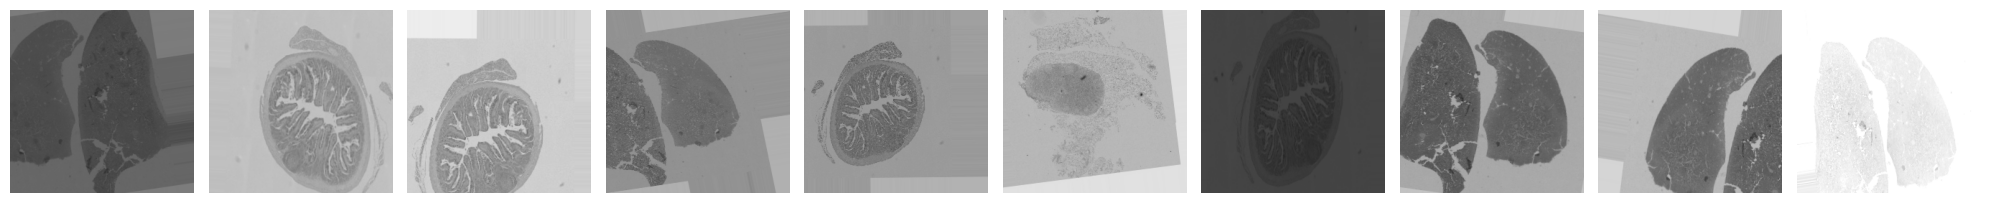

In [21]:
plotImages(imgs)


In [22]:
#VGG16 ARCHITECTURE
'''
Defines and compiles a Convolutional Neural Network (CNN) using the Keras Sequential API. 

Creates a Sequential model.
  - Adds convolutional layers (Conv2D) and max pooling layers (MaxPool2D) in a specific pattern:
  - Starts with an input shape of (256, 256, 3), indicating 256x256 pixel RGB images.
  - Uses ReLU activation functions for all convolutional layers.
  - Gradually increases the number of filters (64 -> 128 -> 256 -> 512) as the network deepens.
  - Uses 3x3 kernel sizes for all convolutional layers.
  - Applies max pooling after every two or three convolutional layers to reduce spatial dimensions.

'''
model = Sequential()
model.add(Conv2D(input_shape=(256,256,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=64,activation="relu"))
model.add(Dense(units=3, activation="softmax"))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/opt/anaconda3/envs/BatGuts4/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [23]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 256, 256, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 128, 128, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 64, 64, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 16, 16, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 16, 16, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 8, 8, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │     2,097,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,812,099 (64.13 MB)

 Trainable params: 16,812,099 (64.13 MB)

 Non-trainable params: 0 (0.00 B)

In [24]:
''' 
This code is useful for determining whether your TensorFlow operations can leverage GPU acceleration, which can 
significantly speed up training and inference tasks.
'''
import tensorflow as tf
tf.test.gpu_device_name()

''

In [25]:
if env_USE_NVIDIA:
    !nvidia-smi

In [26]:
'''
This code is training a machine learning model on a given dataset for 25 epochs, 
with validation performed at the end of each epoch. The training progress and metrics will 
be displayed due to the verbose=True setting. The training history is stored in the hist variable, 
which can be used later to analyze the model's performance over time.
'''
import math
stepsPerEpcoch=math.ceil(train_dataset.samples//32) # The number of steps (batches) to run in each epoch.
print("stepsPerEpoch="+str(stepsPerEpcoch))
hist = model.fit(train_dataset, 
                 steps_per_epoch=stepsPerEpcoch,
                 epochs=25,
                 validation_data=validation_dataset,
                 validation_steps=2,
                 verbose=True)

stepsPerEpoch=2
Epoch 1/25


/opt/anaconda3/envs/BatGuts4/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 8s/step - accuracy: 0.2604 - loss: 1.4416 - val_accuracy: 0.4286 - val_loss: 1.0976
Epoch 2/25


/opt/anaconda3/envs/BatGuts4/lib/python3.12/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 488ms/step - accuracy: 0.2500 - loss: 1.0989 - val_accuracy: 0.4286 - val_loss: 1.0937
Epoch 3/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.3267 - loss: 1.0992 - val_accuracy: 0.4286 - val_loss: 1.0896
Epoch 4/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 7s 492ms/step - accuracy: 0.4375 - loss: 1.0864 - val_accuracy: 0.4286 - val_loss: 1.0697
Epoch 5/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.3674 - loss: 1.1308 - val_accuracy: 0.4286 - val_loss: 1.0662
Epoch 6/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 8s 530ms/step - accuracy: 0.3438 - loss: 1.0811 - val_accuracy: 0.4286 - val_loss: 1.0861
Epoch 7/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 16s 8s/step - accuracy: 0.3958 - loss: 1.0926 - val_accuracy: 0.4286 - val_loss: 1.0912
Epoch 8/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 578ms/step - accuracy: 0.5000 - loss: 1.0879 - val_accuracy: 0.4286 - val_loss: 1.0914
Epoch 9/25
2/2 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.4081 - loss: 1.0927 - val_accuracy: 0.4286 - val_loss: 1.0906
Epoch 10/25

In [27]:
from keras.applications.xception import preprocess_input,decode_predictions
from tensorflow.keras.preprocessing import image

In [28]:
'''
This code defines a function called classify that takes two parameters: img_path (a path to an image file) 
and model (a pre-trained machine learning model). 
The function's purpose is to classify an image using the provided model. Here's a breakdown of what the code does:
Load and preprocess the image:
  image.load_img() loads the image from the given path and resizes it to 256x256 pixels.

  image.img_to_array() converts the loaded image to a NumPy array.
Prepare the image for the model:
  np.expand_dims() adds an extra dimension to the image array, creating a batch with a single image.
  preprocess_input() applies any necessary preprocessing to the image batch, specific to the model being used.
Make a prediction:
  model.predict() uses the provided model to make a prediction on the preprocessed image.
Return the prediction:
  The function returns the prediction made by the model.
This function is likely part of an image classification system, where it's used to classify new i
mages using a pre-trained model. The exact nature of the classification (e.g., object recognition, scene 
classification) depends on how the model was trained.
'''
def classify(img_path,model):
    img = image.load_img(img_path, target_size=(256, 256))
    img_array = image.img_to_array(img)
    print(img_array)
    img_batch = np.expand_dims(img_array, axis=0)

    img_preprocessed = preprocess_input(img_batch)

    prediction = model.predict(img_preprocessed)

    return prediction

In [29]:
file_name='LS042_Cormura_brevirostris-LY20_10-insect-guts-LY20-10A-AB-08-LY20-10A_ab_08_LS042_Cobr_2021-09-21 15-27-21 (B,Radius8,Smoothing4)__green.jpeg'
full_path = env_CONTENT_PATH +'/images/Bats_mixed_images_RGB_256/Insects/' + file_name
if os.path.exists(full_path):
    prediction=classify(full_path,model)
    prediction
else:
    print("Does not exist: " + full_path )

[[[211. 211. 211.]
  [203. 203. 203.]
  [205. 205. 205.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [254. 254. 254.]]

 [[205. 205. 205.]
  [204. 204. 204.]
  [210. 210. 210.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 [[205. 205. 205.]
  [207. 207. 207.]
  [209. 209. 209.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]]

 ...

 [[255. 255. 255.]
  [255. 255. 255.]
  [255. 255. 255.]
  ...
  [255. 255. 255.]
  [252. 252. 252.]
  [254. 254. 254.]]

 [[254. 254. 254.]
  [255. 255. 255.]
  [254. 254. 254.]
  ...
  [255. 255. 255.]
  [255. 255. 255.]
  [252. 252. 252.]]

 [[254. 254. 254.]
  [254. 254. 254.]
  [253. 253. 253.]
  ...
  [251. 251. 251.]
  [255. 255. 255.]
  [254. 254. 254.]]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 154ms/step


In [30]:
file_base = env_TIF_PATH +"/LS022_Desmodus_rotundus_LY20-12-blood"
zDir = file_base + "/LS022_Desmodus_rotundus_LY20-12-blood-guts-LY20-12A-HE-004"
zFile = zDir + "/LS022_Desmodus_rotundus_LY20-12-blood-guts-LY20-12A-HE-004-Plane004.tif"
image_1 = tiff.imread( zFile )

In [31]:
file_base = env_TIF_PATH +"/DRXXX_Brachyphylla_pumila-LY20_13-nectar"
zDir = file_base + "/DRXXX_Brachyphylla_pumila-LY20_13-nectar-guts-LY20-13A-HE-006"
zFile = zDir + "/DRXXX_Brachyphylla_pumila-LY20_13-nectar-guts-LY20-13A-HE-006-Plane004.tif"
image_2 =  tiff.imread(zFile)

In [32]:
'''
 Determine the "Pearson product-moment correlation coefficients." which are a statistical measure that assesses 
 the strength and direction of the linear relationship between two continuous variables. It is denoted by 
 r and ranges from -1 to +1.
#
'''

import numpy as np
import cv2

# Choose a common size for both images
common_size = (1000, 1000)  # or whatever size is appropriate for your use case

image_1_resized = cv2.resize(image_1, common_size)
image_2_resized = cv2.resize(image_2, common_size)

image_1_flat = image_1_resized.flatten()
image_2_flat = image_2_resized.flatten()

correlation = np.corrcoef(image_1_flat, image_2_flat)
print( 'The Pearson product-moment correlation coefficients is:\n' + str(correlation))

The Pearson product-moment correlation coefficients is:
[[1.         0.34128152]
 [0.34128152 1.        ]]


In [33]:
'''
use a function called corr2 to calculate the 2D correlation coefficient between two flattened images.
'''

corr2(image_1_flat,image_2_flat)


0.3412815150793265

In [34]:
'''
Now we will launch the mlflow user interface which allows you to conduct machine learning experiments
Click on any key at the top of the screen to terminate the mlflow web server
'''
from settings import run_mlflow_until_q
run_mlflow_until_q()

MLflow UI started. Access it at http://127.0.0.1:5000
Enter 'q' up at the top of the screen to terminate
MLflow UI has been shut down.


In [35]:
import os
zDir = env_CONTENT_PATH 

os.chdir( zDir)
print( "The current working directory is: " + os.getcwd() )

The current working directory is: /Users/thomasyohe/isr/bguts


In [36]:
'''
This cell is setting up the environment for a machine learning project, 
likely involving image processing or natural language processing. Here's a summary of what it does:

    Sets up matplotlib to display plots inline in the notebook using the magic command %matplotlib inline.
    Declares a global variable embed and initializes it with a TensorFlow Hub KerasLayer. This layer is loaded 
    from the current working directory, suggesting that a pre-trained model is being used.

This cell is essentially preparing the environment for a project that likely involves:
    Working with machine learning models (possibly pre-trained)
    Processing and analyzing data (possibly images or text)
    Creating visualizations
    Performing mathematical operations
'''
import tensorflow as tf             # TensorFlow and TensorFlow Hub for machine learning
import tensorflow_hub as hub
import numpy as np                  # for numerical computations
import os                           # for file and directory operations
import pandas as pd                 # for data manipulation and analysis
import matplotlib.pyplot as plt     # for plotting and visualization
import base64                       # or encoding/decoding data
from PIL import Image               # (Python Imaging Library) for image processing
import io
import math
from math import sqrt

# The following line is a special command known as a "magic command" that affects how matplotlib plots are displayed.
%matplotlib inline

global embed
zModelPath = zDir + "/IVP_MODEL.keras"
from tensorflow.keras.models import load_model

# Specify the path to your .keras model file

embed = load_model(zModelPath)


/opt/anaconda3/envs/BatGuts4/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 314 variables whereas the saved optimizer has 2 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


In [37]:
'''
The TensorVector class is designed to read an image file, preprocess it (including resizing and normalization), 
and extract features using a specified embedding function. The output is a list of features that can be used for 
various tasks, such as image classification, similarity search, or other machine learning applications.
'''
class TensorVector(object):

    def __init__(self, FileName=None):
        self.FileName = FileName

    def process(self):

        img = tf.io.read_file(self.FileName)
        img = tf.io.decode_jpeg(img, channels=3)
        img = tf.image.resize_with_pad(img, env_IMAGE_SHAPE_Y, env_IMAGE_SHAPE_Y)
        img = tf.image.convert_image_dtype(img,tf.float32)[tf.newaxis, ...]
        features = embed(img)
        feature_set = np.squeeze(features)
        return list(feature_set)

In [38]:
file_name='LS042_Cormura_brevirostris-LY20_10-insect-guts-LY20-10A-AB-08-LY20-10A_ab_08_LS042_Cobr_2021-09-21 15-27-21 (B,Radius8,Smoothing4)__green.jpeg'
full_path = env_CONTENT_PATH +'/images/Bats_mixed_images_RGB_256/Insects/' + file_name
if os.path.exists(full_path):
    helper = TensorVector( full_path)
    print("helper created for "+ full_path)
    vector = helper.process()
    print("The vector is: " + str(vector))
else:
    print("Does not exist: " + full_path )


helper created for /Users/thomasyohe/isr/bguts/images/Bats_mixed_images_RGB_256/Insects/LS042_Cormura_brevirostris-LY20_10-insect-guts-LY20-10A-AB-08-LY20-10A_ab_08_LS042_Cobr_2021-09-21 15-27-21 (B,Radius8,Smoothing4)__green.jpeg
The vector is: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0